In [16]:
import pandas as pd
import seaborn as sns

In [7]:
database = pd.read_csv("/Users/amirzar/Desktop/Spotify_data/Csv/tracks.csv")
Liked_songs = pd.read_csv(
    '/Users/amirzar/Desktop/Spotify_data/Csv/merged_file.csv')


In [8]:
# count the number of duplicates and add the count in front of each value
Liked_songs['repeated'] = Liked_songs.groupby('id')['id'].transform('size')

# drop the duplicates
Liked_songs = Liked_songs.drop_duplicates(subset='id')

# sort the values by count in descending order
Liked_songs = Liked_songs.sort_values(by='repeated', ascending=False)

# reset the index
Liked_songs = Liked_songs.reset_index(drop=True)

# display the final result
Liked_songs


,id,name,popularity,duration_ms,explicit,artists_x,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,endTime,artists_y,msPlayed,repeated
0,3U7xlkzHOQT2STYEtg7rPr,Jerusalem,47,469733,0,"The Wailers', 'Alpha Blondy","['0jHCJWgwdcqysvbKWjXSI6', '41ekW4MXG59xJMXR8d...",1986,0.717,0.4460,...,0.42700,0.000055,0.1060,0.6930,131.070,4,2022-04-18 14:29,Anúna,319116,37
1,0bwhjxWZFtwllJIwh3E0Bk,La ballata dell'uomo in piu,35,214787,0,Peppino Gagliardi,['1kTBhbobT38Dg6tfbHPK91'],1995,0.497,0.1880,...,0.75500,0.000001,0.1270,0.5010,115.315,5,2022-06-20 06:09,Peppino Gagliardi,198766,28
2,2S7RApTsKT0CtYojYq2cKz,L'italiano,64,236547,0,Toto Cutugno,['6elIiwc8OyeqKxXe2rmPXZ'],1983-02-01,0.617,0.5190,...,0.29200,0.000000,0.4110,0.6920,121.350,4,2022-06-20 05:38,Toto Cutugno,236546,24
3,0P5Vhvmf68WqqFttv3S7KK,Bregovic: Ederlezi,37,347733,0,"Goran Bregović', 'Nigel Kennedy', 'The Kroke Band","['491v9k5NTGBGanwqPNSkuS', '7AANfmLM36QqH6QsOQ...",2003-06-02,0.161,0.1530,...,0.96100,0.147000,0.1840,0.0378,79.068,1,2022-10-22 15:48,Goran Bregović,347733,24
4,4uafWYRA8dWpmhidUl4A1G,Ulysses' Gaze: 1. Ulysses' Theme,28,85133,0,"Eleni Karaindrou', 'Kim Kashkashian', 'Lefteri...","['2ojmPypSGMyKaRvknyxKKP', '6ZGBjaZJPB8JHVBpHv...",1995-09-01,0.332,0.0475,...,0.91000,0.970000,0.0971,0.0500,134.292,4,2022-10-22 17:30,Eleni Karaindrou,85133,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,7d3Qjp1PWUwE0p0QWpmGM1,Michelle,0,126399,0,The New Merseysiders,['5oqAUfibbMIA08TufojASy'],2020-06-04,0.640,0.2140,...,0.91800,0.961000,0.0691,0.6290,61.749,4,2023-03-11 18:36,Anton Byers,212073,1
234,21D0muOMLK4P0jrsAYKLij,"Long, Long Way from Home",47,172573,0,Foreigner,['6IRouO5mvvfcyxtPDKMYFN'],1977-03-08,0.621,0.8800,...,0.30200,0.000000,0.1700,0.5220,128.215,4,2022-12-24 13:15,Foreigner,1264,1
235,6JCSPI05AEJMBbJTIIXBOi,Starry Night,27,447720,0,"Kabza De Small', 'DJ Maphorisa', 'TRESOR","['1bNjWBFWsAAzZSR59lRdpR', '0mMqD2uqwvCjFvlzo6...",2021-04-09,0.781,0.5230,...,0.00959,0.008620,0.1250,0.2170,111.996,4,2022-11-10 05:35,Café,118221,1
236,3uPkidnkvuQS8yI6Hz2zKo,Fireplace,14,158833,0,Sleepy Fish,['1IJe80moz409PtxW4llPFw'],2020-12-20,0.750,0.2460,...,0.91200,0.956000,0.0900,0.3170,68.087,4,2023-03-11 18:29,Carmelito,111500,1


In [13]:
## Adding The liked songs to the database as 1 (Liked) 0(not liked)

liked_ids = set(Liked_songs['id'])
database['liked'] = database['id'].isin(liked_ids).astype(int)

In [15]:
database['liked'].value_counts()

0    586434
1       238
Name: liked, dtype: int64

These Number are expected as the number of unique songs we heared was 238 ( we assume that each unique song I heared I liked it ) 

<AxesSubplot: xlabel='liked', ylabel='count'>

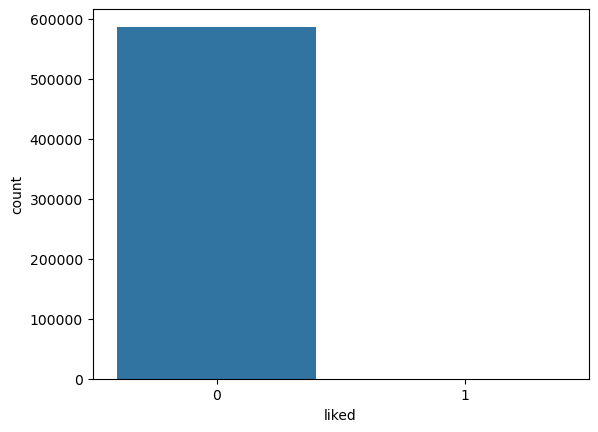

In [20]:
sns.countplot(x = 'liked', data=database)

In [21]:
database.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'liked'],
      dtype='object')

In [56]:
database['mode']


0         1
1         1
2         1
3         1
4         0
         ..
586667    0
586668    1
586669    0
586670    1
586671    1
Name: mode, Length: 586672, dtype: int64

In [40]:
from imblearn.over_sampling import RandomOverSampler
X = database[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]

y = database['liked']

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)


In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros)

In [63]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, learning_rate=0.1,
                           depth=6, eval_metric='Accuracy', verbose=10)


In [64]:
cat_col = ['mode']
model.fit(X_train, y_train, cat_col, eval_set=(X_test, y_test))

0:	learn: 0.7768251	test: 0.7771071	best: 0.7771071 (0)	total: 196ms	remaining: 19.4s
10:	learn: 0.8449215	test: 0.8441939	best: 0.8441939 (10)	total: 1.18s	remaining: 9.58s
20:	learn: 0.8766738	test: 0.8767739	best: 0.8767739 (20)	total: 2.04s	remaining: 7.67s
30:	learn: 0.8917934	test: 0.8918378	best: 0.8949822 (29)	total: 3.02s	remaining: 6.71s
40:	learn: 0.9250794	test: 0.9245235	best: 0.9245235 (40)	total: 3.83s	remaining: 5.51s
50:	learn: 0.9519059	test: 0.9512102	best: 0.9512102 (50)	total: 4.69s	remaining: 4.5s
60:	learn: 0.9608697	test: 0.9604764	best: 0.9604764 (60)	total: 5.51s	remaining: 3.52s
70:	learn: 0.9684807	test: 0.9682556	best: 0.9682556 (70)	total: 6.3s	remaining: 2.57s
80:	learn: 0.9711420	test: 0.9712159	best: 0.9712159 (80)	total: 7.12s	remaining: 1.67s
90:	learn: 0.9748571	test: 0.9749810	best: 0.9749810 (90)	total: 7.96s	remaining: 787ms
99:	learn: 0.9774956	test: 0.9773888	best: 0.9773888 (99)	total: 8.71s	remaining: 0us

bestTest = 0.9773887599
bestIteration

In [66]:
y_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm


array([[140081,   6630],
       [     0, 146506]])

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98    146711
           1       0.96      1.00      0.98    146506

    accuracy                           0.98    293217
   macro avg       0.98      0.98      0.98    293217
weighted avg       0.98      0.98      0.98    293217

